# Chili Pepper Scoville Prediction

## Introduction  
This project predicts the **Scoville Heat Units (SHU)** of chili peppers based on their physical, chemical, categorical, and environmental attributes. The dataset includes features such as size, weight, pericarp thickness, seed count, capsaicin content, vitamin C, sugar, moisture, firmness, color, and harvest conditions.  

The workflow involves:  
- Exploratory Data Analysis (EDA) to understand distributions, correlations, and data quality issues  
- Data cleaning and preprocessing, including handling missing values and encoding categorical variables  
- Building pipelines with scaling, encoding, and model integration  
- Regression modeling with Linear Regression, Ridge, Random Forest, Gradient Boosting, and XGBoost  
- Evaluating performance with cross-validation and Mean Absolute Error (MAE)  


## **Imports**

In [6]:
# === Libraries for data handling and visualization ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, make_scorer, confusion_matrix, accuracy_score

## **Reading data**

In [7]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## **Data exploration and visualisation**

In [8]:
# Set seaborn aesthetics
sns.set(style="whitegrid")

### *Get Overview of Data*

In [9]:
# Print shape for both train and test set
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (1000, 15)
Test shape: (800, 14)


Training set consists of 1000 rows and 15 columns, while the test set contains 800 rows and 14 columns.

In [10]:
# Display first rows of train set
train_df.head()

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU)
0,17.37,5.42,94.30,4.90,193.93,3.21,173.59,6.15,88.59,3.40,red,Midday,8.68,5-6,0.00
1,27.78,4.75,262.71,6.56,186.29,8.19,100.41,2.36,111.20,5.45,green,Midday,22.44,NaN,0.00
2,6.17,3.51,66.72,7.96,298.81,4.69,125.91,6.75,72.98,2.77,red,Midday,24.99,NaN,455995.06
3,6.12,6.07,51.24,4.57,39.36,2.76,143.54,5.93,63.93,1.62,yellow,Midday,13.05,NaN,0.00
4,28.58,4.84,166.51,3.07,194.07,7.01,193.76,2.85,88.19,3.99,red,Midday,27.08,NaN,0.00


In [11]:
# Display first rows of test set
test_df.head()

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius)
0,20.60,6.92,90.98,3.55,2.25,0.89,128.00,6.64,75.72,4.33,red,Midday,28.05,7-8
1,9.38,11.84,130.67,0.51,2.92,4.86,158.31,1.45,121.15,3.95,yellow,Midday,18.89,NaN
2,7.65,3.87,78.76,8.88,125.27,3.55,96.85,3.80,133.85,3.35,yellow,Midday,15.87,NaN
3,9.04,7.89,149.76,5.26,284.68,3.86,231.46,4.99,109.73,5.50,red,Midday,19.51,NaN
4,9.80,6.65,127.25,1.38,126.19,12.60,174.90,5.33,104.12,1.61,red,Midday,23.61,NaN


Most features appear to be numeric, with a few categorical ones such as 'color' and 'Harvest Time'. We can also see that the target variable 'Scoville Heat Units (SHU)' ranges from 0 to very high values. Additionally, the column 'Average Temperature During Storage (celsius)' has many missing values (NaN), and is stored as an object type, which suggests it may contain non-numeric or inconsistent values and will require cleaning before use in modeling.

In [12]:
train_df.describe()

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,Average Daily Temperature During Growth (celcius),Scoville Heat Units (SHU)
count,999.000000,999.000000,999.000000,998.000000,999.000000,999.000000,1000.000000,999.000000,1000.000000,999.000000,1000.000000,1000.000000
mean,15.574675,6.641572,169.346406,4.619499,128.731301,4.215385,142.035180,3.283534,90.878380,3.679179,19.641960,70941.260020
std,6.267303,2.139023,123.779026,2.829503,87.270366,3.163125,72.246142,1.938264,18.724314,1.034726,6.436255,108149.917069
min,0.300000,0.100000,0.560000,0.000000,0.040000,0.010000,0.950000,0.010000,31.400000,0.850000,0.840000,0.000000
25%,11.290000,5.140000,79.020000,2.400000,55.390000,1.710000,92.290000,1.865000,78.585000,2.980000,15.397500,0.000000
50%,15.520000,6.600000,147.230000,4.280000,119.490000,3.590000,141.730000,3.140000,89.690000,3.660000,19.495000,0.000000
75%,19.900000,8.045000,227.625000,6.560000,186.845000,6.115000,192.720000,4.555000,103.200000,4.375000,23.530000,121349.617500
max,35.570000,13.620000,869.970000,14.630000,487.260000,19.020000,450.290000,9.360000,158.300000,8.250000,40.700000,527639.860000


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Length (cm)                                        999 non-null    float64
 1   Width (cm)                                         999 non-null    float64
 2   Weight (g)                                         999 non-null    float64
 3   Pericarp Thickness (mm)                            998 non-null    float64
 4   Seed Count                                         999 non-null    float64
 5   Capsaicin Content                                  999 non-null    float64
 6   Vitamin C Content (mg)                             1000 non-null   float64
 7   Sugar Content                                      999 non-null    float64
 8   Moisture Content                                   1000 non-null   float64
 9   Firmness 

There are a few missing values across the dataset. Most numerical features are only missing 1 or 2 values, which can easily be imputed. However, the column Average Temperature During Storage (celsius) is missing a significant portion of its data, with only 352 non-null values. This might require special treatment, such as dropping the column, encoding "missing" as a category, or trying to impute based on other features.



#### Check for missing values

In [14]:
# Missing values in train - only show those with missing
train_df.isna().sum()[train_df.isna().sum() > 0]

Length (cm)                                       1
Width (cm)                                        1
Weight (g)                                        1
Pericarp Thickness (mm)                           2
Seed Count                                        1
Capsaicin Content                                 1
Sugar Content                                     1
Firmness                                          1
color                                             1
Average Temperature During Storage (celcius)    648
dtype: int64

This confirms that there is 648 missing values in the "Average Temperature During Storage (celcius)" -feature, there is also 1-2 missing values in several of the features.

In [15]:
# Mising values in test set
test_df.isna().sum()[test_df.isna().sum() > 0]

Length (cm)                                       2
Capsaicin Content                                 1
Moisture Content                                  1
Firmness                                          2
Average Temperature During Storage (celcius)    522
dtype: int64

The test data also has some missing values, as well as a large amount in the Average Temperature During Storing. 

There is quite a spread in the Length, Width, Seed Count and Capasaicin Content. Weight varies a lot, from 869.97g to 0.56g, and have a high std. The feature is very spread out. Models like linear regression, ridge and gradient boosting can be sensitive to large values. A few extreme weights(histogram further down), can skew the model towards fitting those outliters, which may not represent the typical data. 


Pericarp Thickness has a min. of 0, which doesn't make sense because then it would be a non-existing outer "wall"? Lets have a look at the unique values of Pericarp Thickness.

In [16]:
#Pericarpt thickness
print(sorted(train_df["Pericarp Thickness (mm)"].unique()))


[0.04, 0.06, 0.07, 0.11, 0.2, 0.21, 0.22, 0.24, 0.34, 0.35, 0.4, 0.46, 0.47, 0.52, 0.54, 0.57, 0.58, 0.6, 0.62, 0.69, 0.7, 0.79, 0.82, 0.83, 0.85, 0.89, 0.94, 0.97, 0.98, 1.01, 1.07, 1.08, 1.1, 1.15, 1.19, 1.21, 1.33, 1.34, 1.36, 1.39, 1.44, 1.46, 1.47, 1.53, 1.55, 1.56, 1.58, 1.59, 1.61, 1.64, 1.65, 1.7, 1.8, 1.84, 1.85, 1.87, 1.88, 1.9, 2.0, 2.01, 2.02, 2.03, 2.04, 2.06, 2.08, 2.09, 2.1, 2.11, 2.13, 2.14, 2.19, 2.23, 2.24, 2.32, 2.34, 2.36, 2.37, 2.42, 2.43, 2.44, 2.45, 2.47, 2.48, 2.5, 2.52, 2.53, 2.54, 2.55, 2.57, 2.58, 2.59, 2.6, 2.63, 2.65, 2.66, 2.68, 2.7, 2.71, 2.72, 2.73, 2.75, 2.78, 2.81, 2.83, 2.86, 2.89, 2.92, 2.93, 2.94, 2.95, 2.98, 3.0, 3.04, 3.06, 3.07, 3.1, 3.13, 3.19, 3.2, 3.22, 3.23, 3.28, 3.3, 3.33, 3.34, 3.36, 3.39, 3.42, 3.43, 3.44, 3.45, 3.47, 3.49, 3.51, 3.52, 3.56, 3.62, 3.63, 3.65, 3.68, 3.7, 3.71, 3.77, 3.78, 3.79, 3.81, 3.85, 3.86, 3.87, 3.9, 3.91, 3.92, 3.94, 3.99, 4.0, 4.04, 4.1, 4.11, 4.12, 4.13, 4.14, 4.2, 4.21, 4.22, 4.23, 4.25, 4.26, 4.28, 4.32, 4.37, 4

In the middle after 'Nan', we have a sample with zero. It might be an measurement error, data entry mistake, or filled with a 0 because of a missing value. But we cant know for sure, and there are several reasons why this might has happend. Maybe this value also should be switched out, like the NaN?

### *Target Variable Analysis*

In [17]:
# Choose to change the name of the target for more efficient writing
train_df.rename(columns={"Scoville Heat Units (SHU)": "SHU"}, inplace=True)

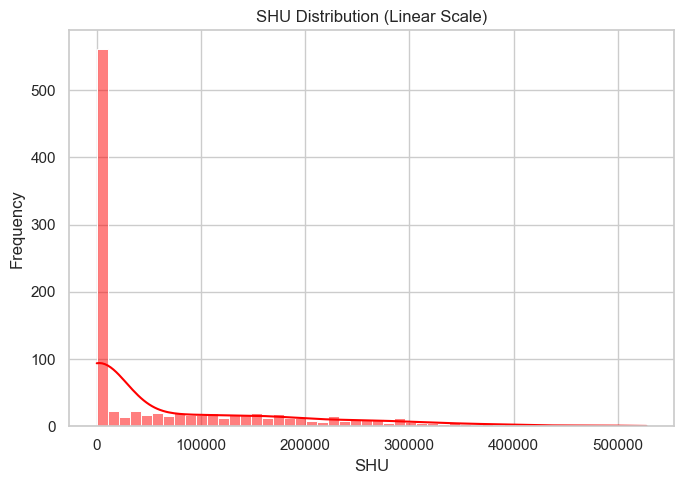

In [18]:
# Plot distribution of target - linear
plt.figure(figsize=(7, 5))
sns.histplot(train_df["SHU"], bins=50, kde=True, color="red")
plt.title("SHU Distribution (Linear Scale)")
plt.xlabel("SHU")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Most of the values is 0, or around 0, indicating that there is a lot of mild peppers. At the same time, there is a long right tail, with quite big values. This shows that the target is highly skewed with a lot of 0-values and some extreme outliers.

To get better insight, we choose to look at the log transformed plot of SHU as comparison.

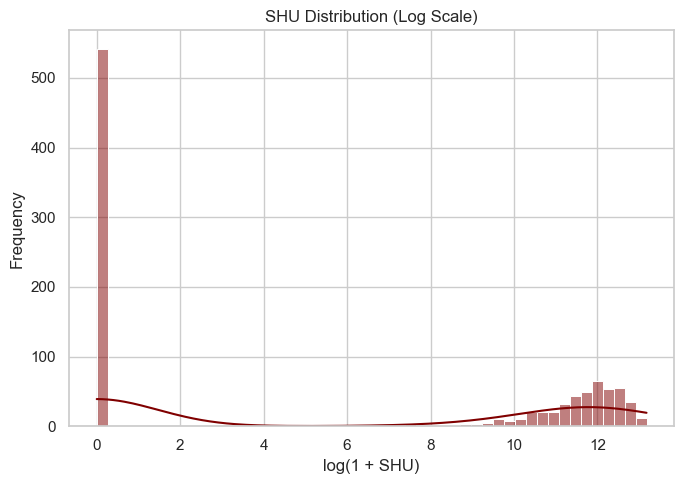

In [19]:
# Log transformed distribution
plt.figure(figsize=(7, 5))
sns.histplot(np.log1p(train_df["SHU"]), bins=50, kde=True, color = "maroon")
plt.title("SHU Distribution (Log Scale)")
plt.xlabel("log(1 + SHU)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

This makes it a bit easier to see the distribution of the peppers with higher SHU. The spicy peppers now have more of a normal distribution, except for the 0-values. 

In [20]:
# Check the amount of unique SHU-values
print(f"Number of unique SHU values: {train_df['SHU'].nunique()}")
print(f"Number of non-spicy peppers (SHU = 0): {(train_df['SHU'] == 0).sum()}")

Number of unique SHU values: 460
Number of non-spicy peppers (SHU = 0): 541


This indicates that approx. 54,1% of the dataset is non-spicy peppers. 

### *Exploration of Numerical Features*

In [21]:
# Gather the numerical features
numeric_cols = train_df.select_dtypes(include=["float64", "int64"]).columns.tolist()
# Check the features
numeric_cols


['Length (cm)',
 'Width (cm)',
 'Weight (g)',
 'Pericarp Thickness (mm)',
 'Seed Count',
 'Capsaicin Content',
 'Vitamin C Content (mg)',
 'Sugar Content',
 'Moisture Content',
 'Firmness',
 'Average Daily Temperature During Growth (celcius)',
 'SHU']

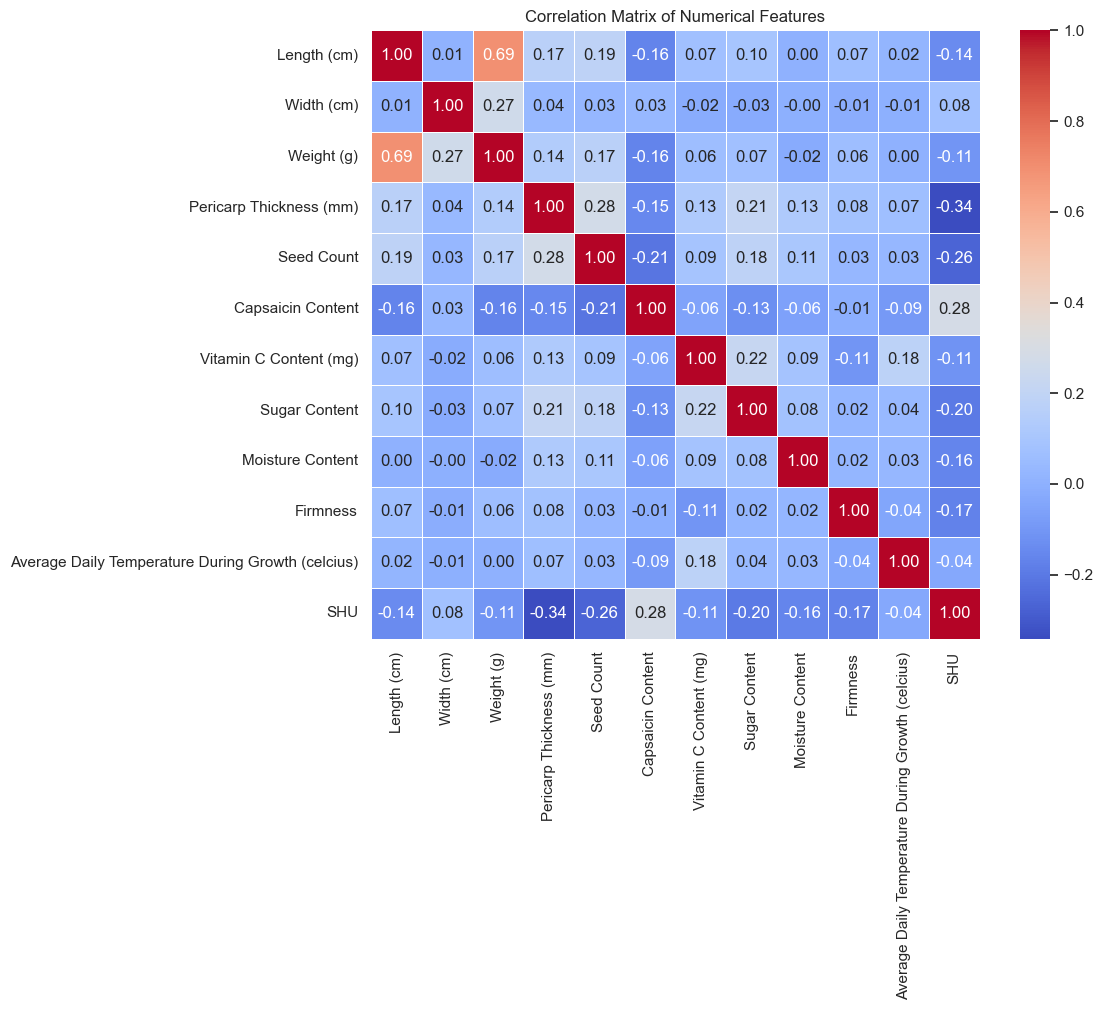

In [22]:
# Correlation matrix
corr_matrix = train_df[numeric_cols].corr()

# Full correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

Length and Weigth seems to be the only features with a somewhat high correlation, which is not surprising as these could complement each other - longer peppers might weigth more. 

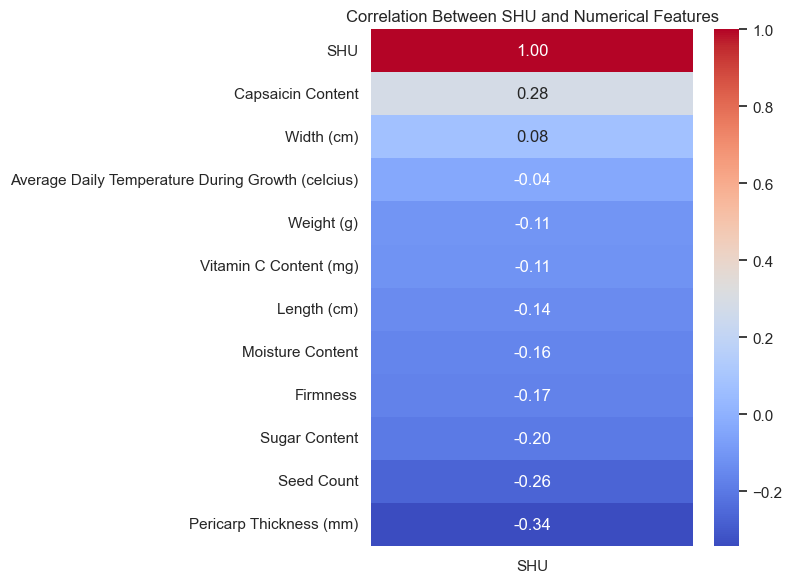

In [23]:
# Correlation with SHU
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['SHU']].sort_values(by='SHU', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between SHU and Numerical Features")
plt.tight_layout()
plt.show()

None of the features shows a high correlation to the SHU. Most of them has a negative correlation. The Capasaicin Content has the "highest" positive correlation of them, but this is not a high correlation either. One can conclude that there is mostly weak correlations with the SHU.

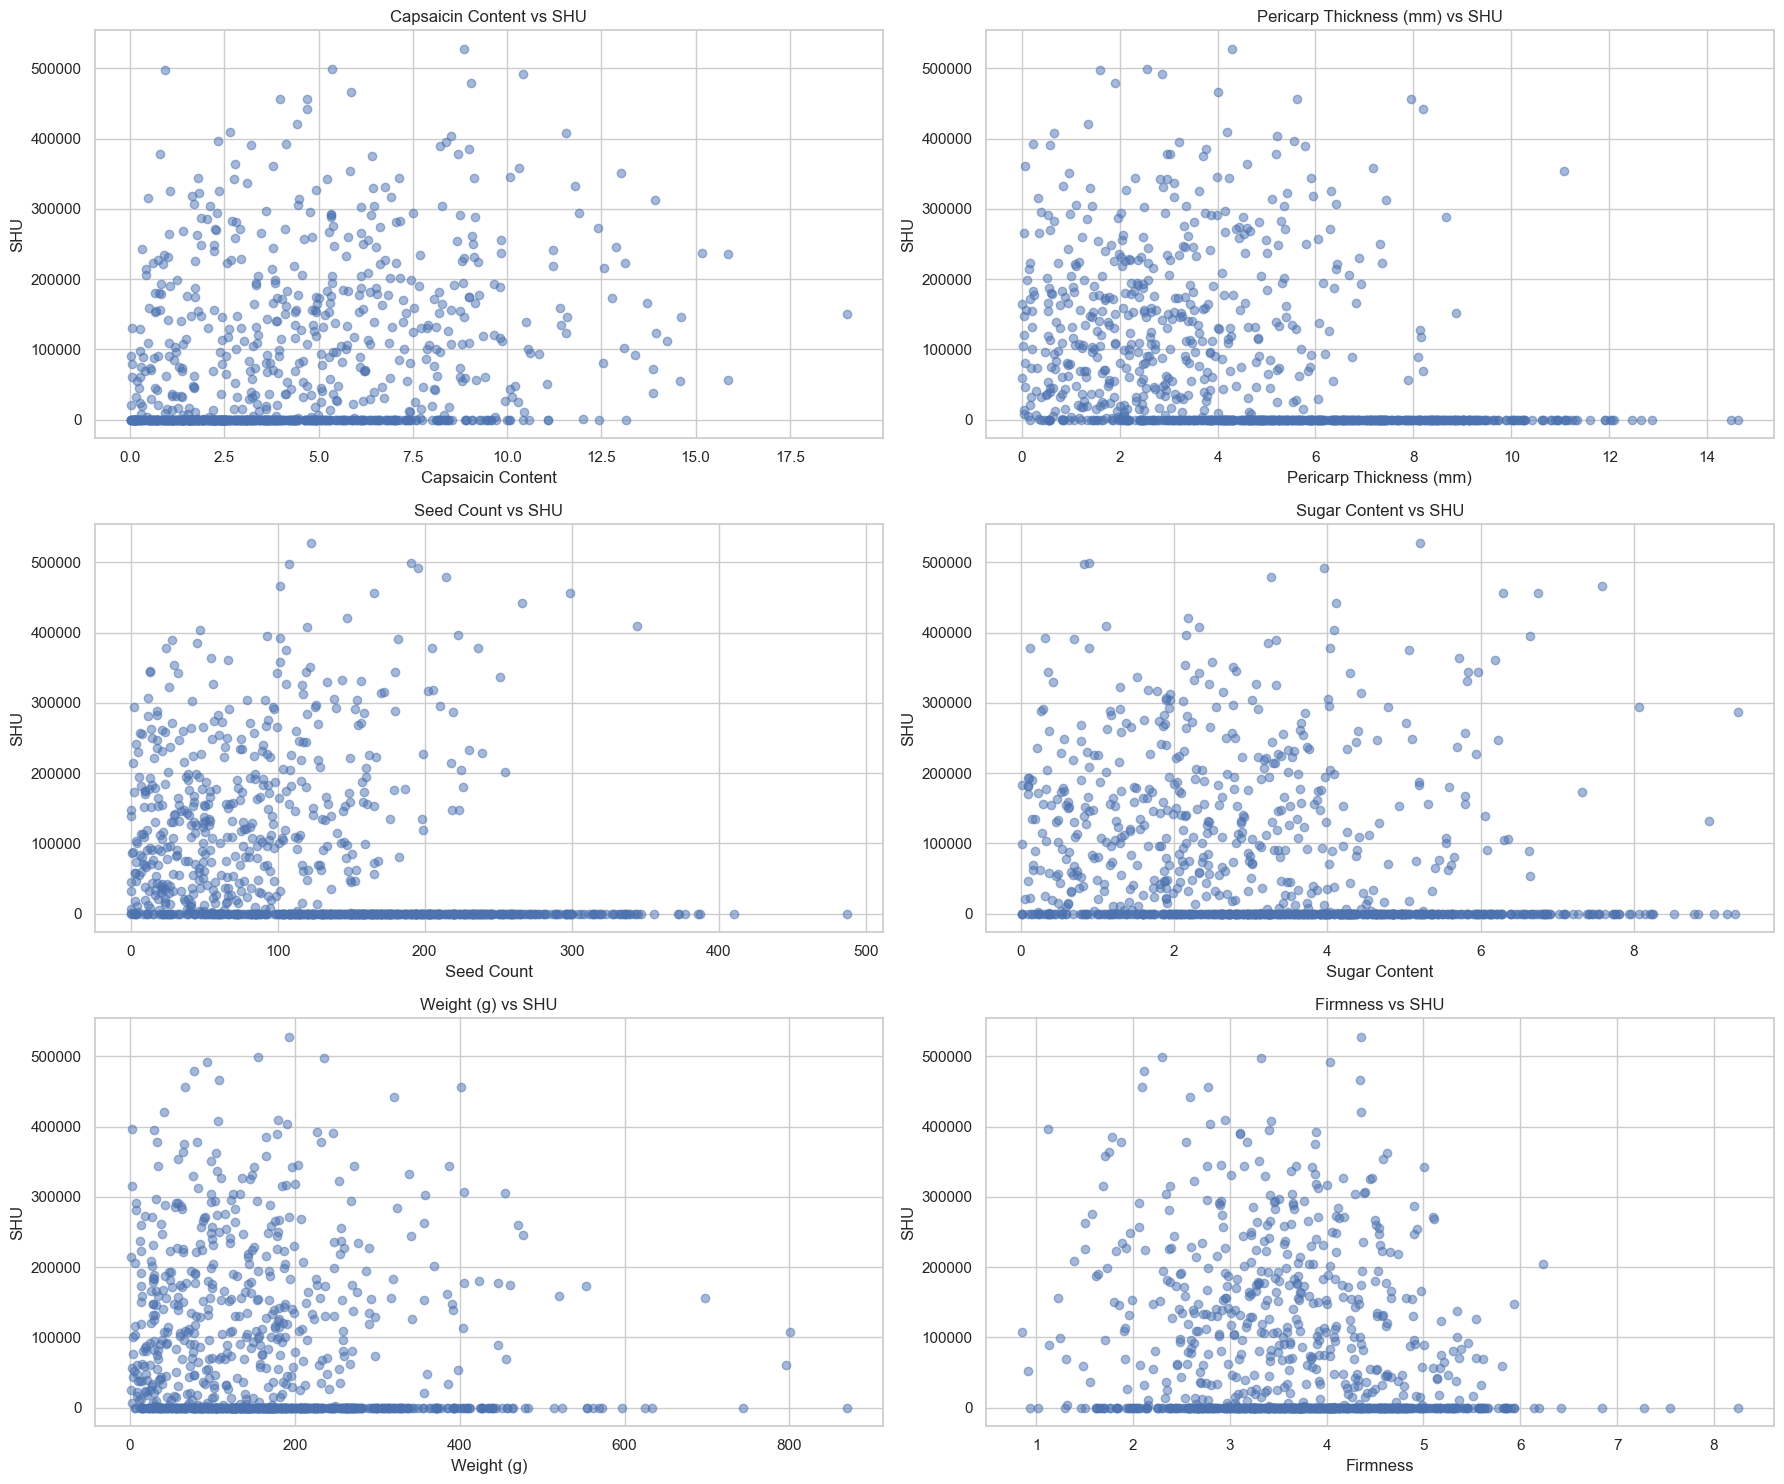

In [24]:
# Scatterplots for selected features
selected_features = ['Capsaicin Content', 'Pericarp Thickness (mm)', 
                'Seed Count', 'Sugar Content', 
                'Weight (g)', 'Firmness']

fig, axs = plt.subplots(3, 2, figsize=(18, 15))
axs = axs.ravel()
for i, feature in enumerate(selected_features):
    axs[i].scatter(train_df[feature], train_df['SHU'], alpha=0.5)
    axs[i].set_title(f"{feature} vs SHU")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("SHU")
plt.tight_layout()
plt.show()

There is no strong linear relationships or clear patterns between the selected features and the SHU, with a clear spread.

### *Categorical Feature Analysis*

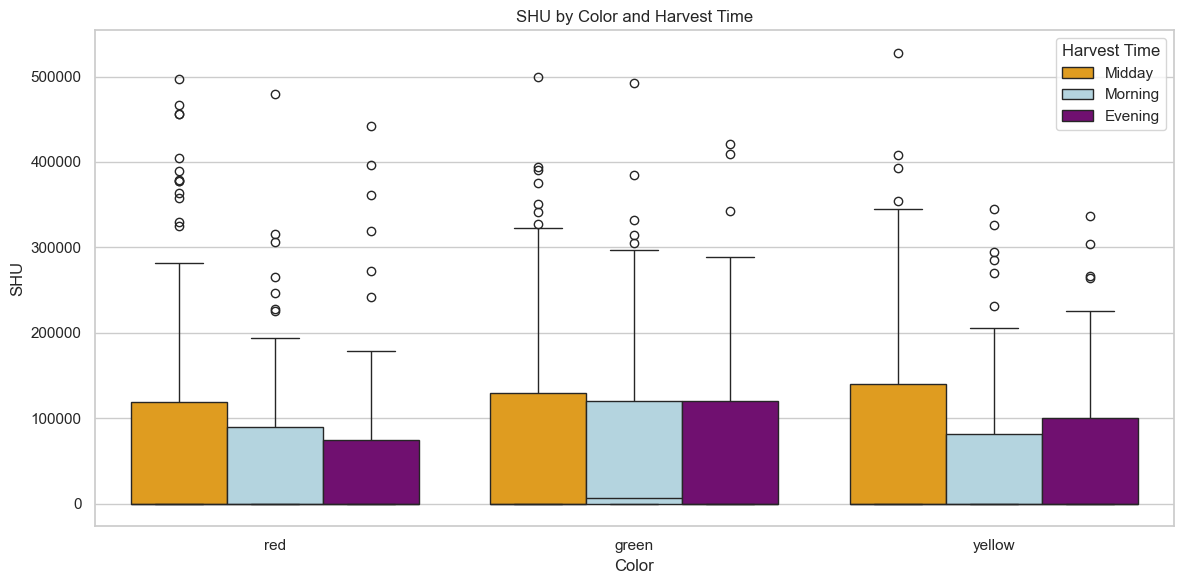

In [25]:
# Kombinert boxplot med både farge og harvest time
plt.figure(figsize=(12, 6))
sns.boxplot(x='color', y='SHU', hue='Harvest Time', data=train_df,
            palette={'Morning': 'lightblue', 'Midday': 'orange', 'Evening': 'purple'})
plt.title("SHU by Color and Harvest Time")
plt.xlabel("Color")
plt.ylabel("SHU")
plt.tight_layout()
plt.show()

The peppers harvested in midday seems to have some higher median values compared to the others, but the variations are not huge. The differences are moderate, and there is some outliers in all of them. 

### *Boxplots*

<Figure size 1200x1000 with 0 Axes>

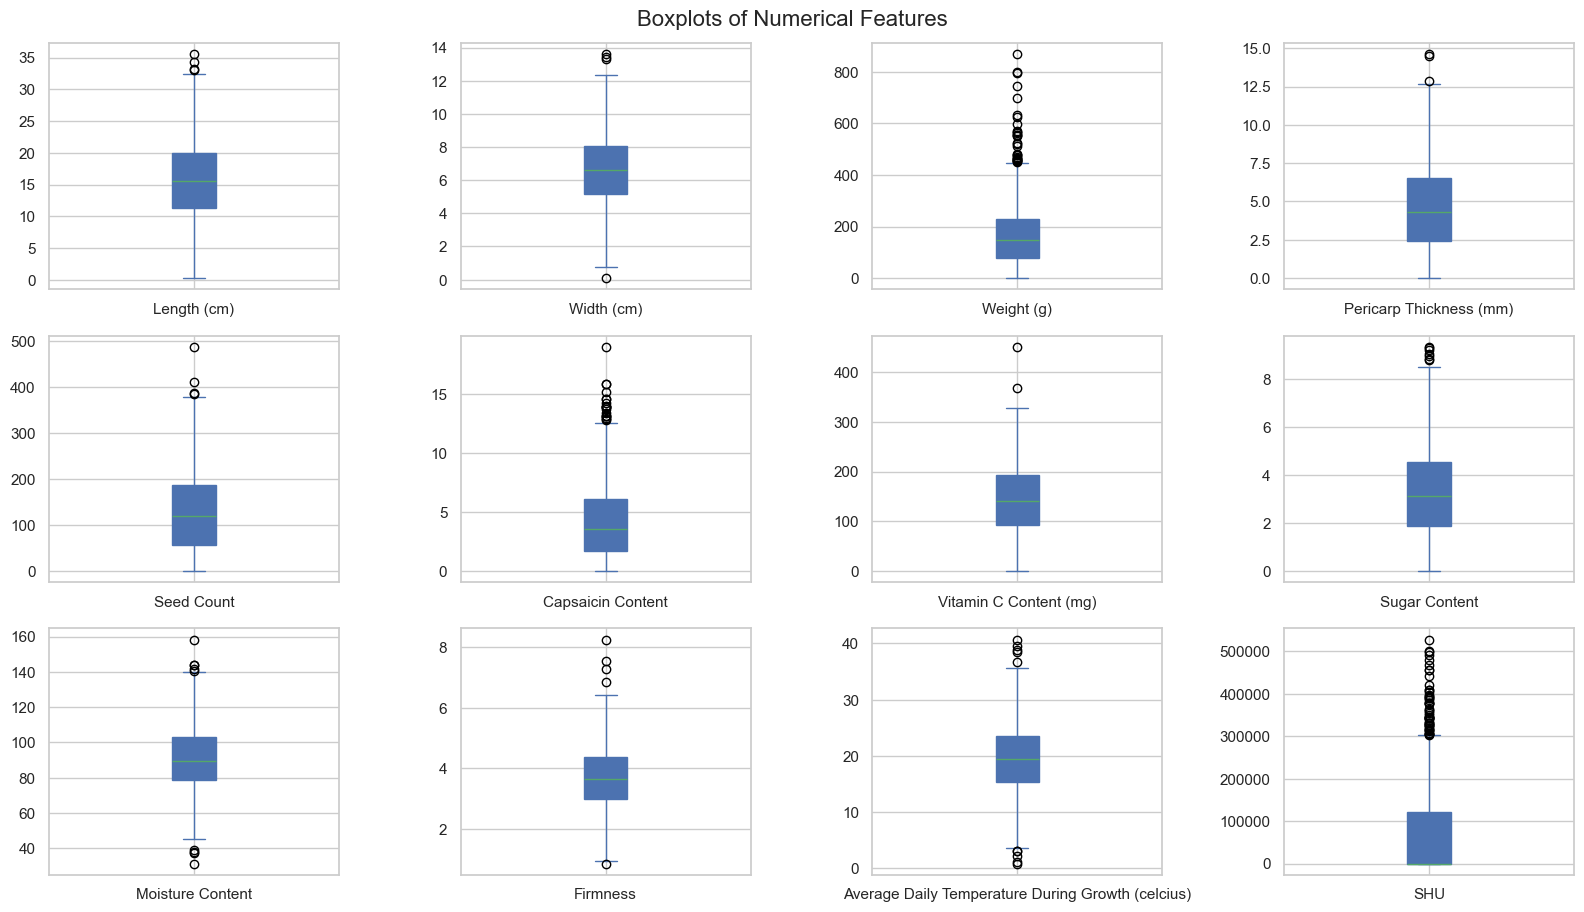

In [26]:
# Boxplot of all numerical features
plt.figure(figsize=(12, 10))
train_df[numeric_cols].plot(kind='box', subplots=True, layout=(4, 4), figsize=(16, 12), patch_artist=True)
plt.suptitle("Boxplots of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

There seems to be outliers in all the analysed features, whereas some has quite a big amount, i.e. Weight, Capasaicin Content and the target. 

### *Histograms*

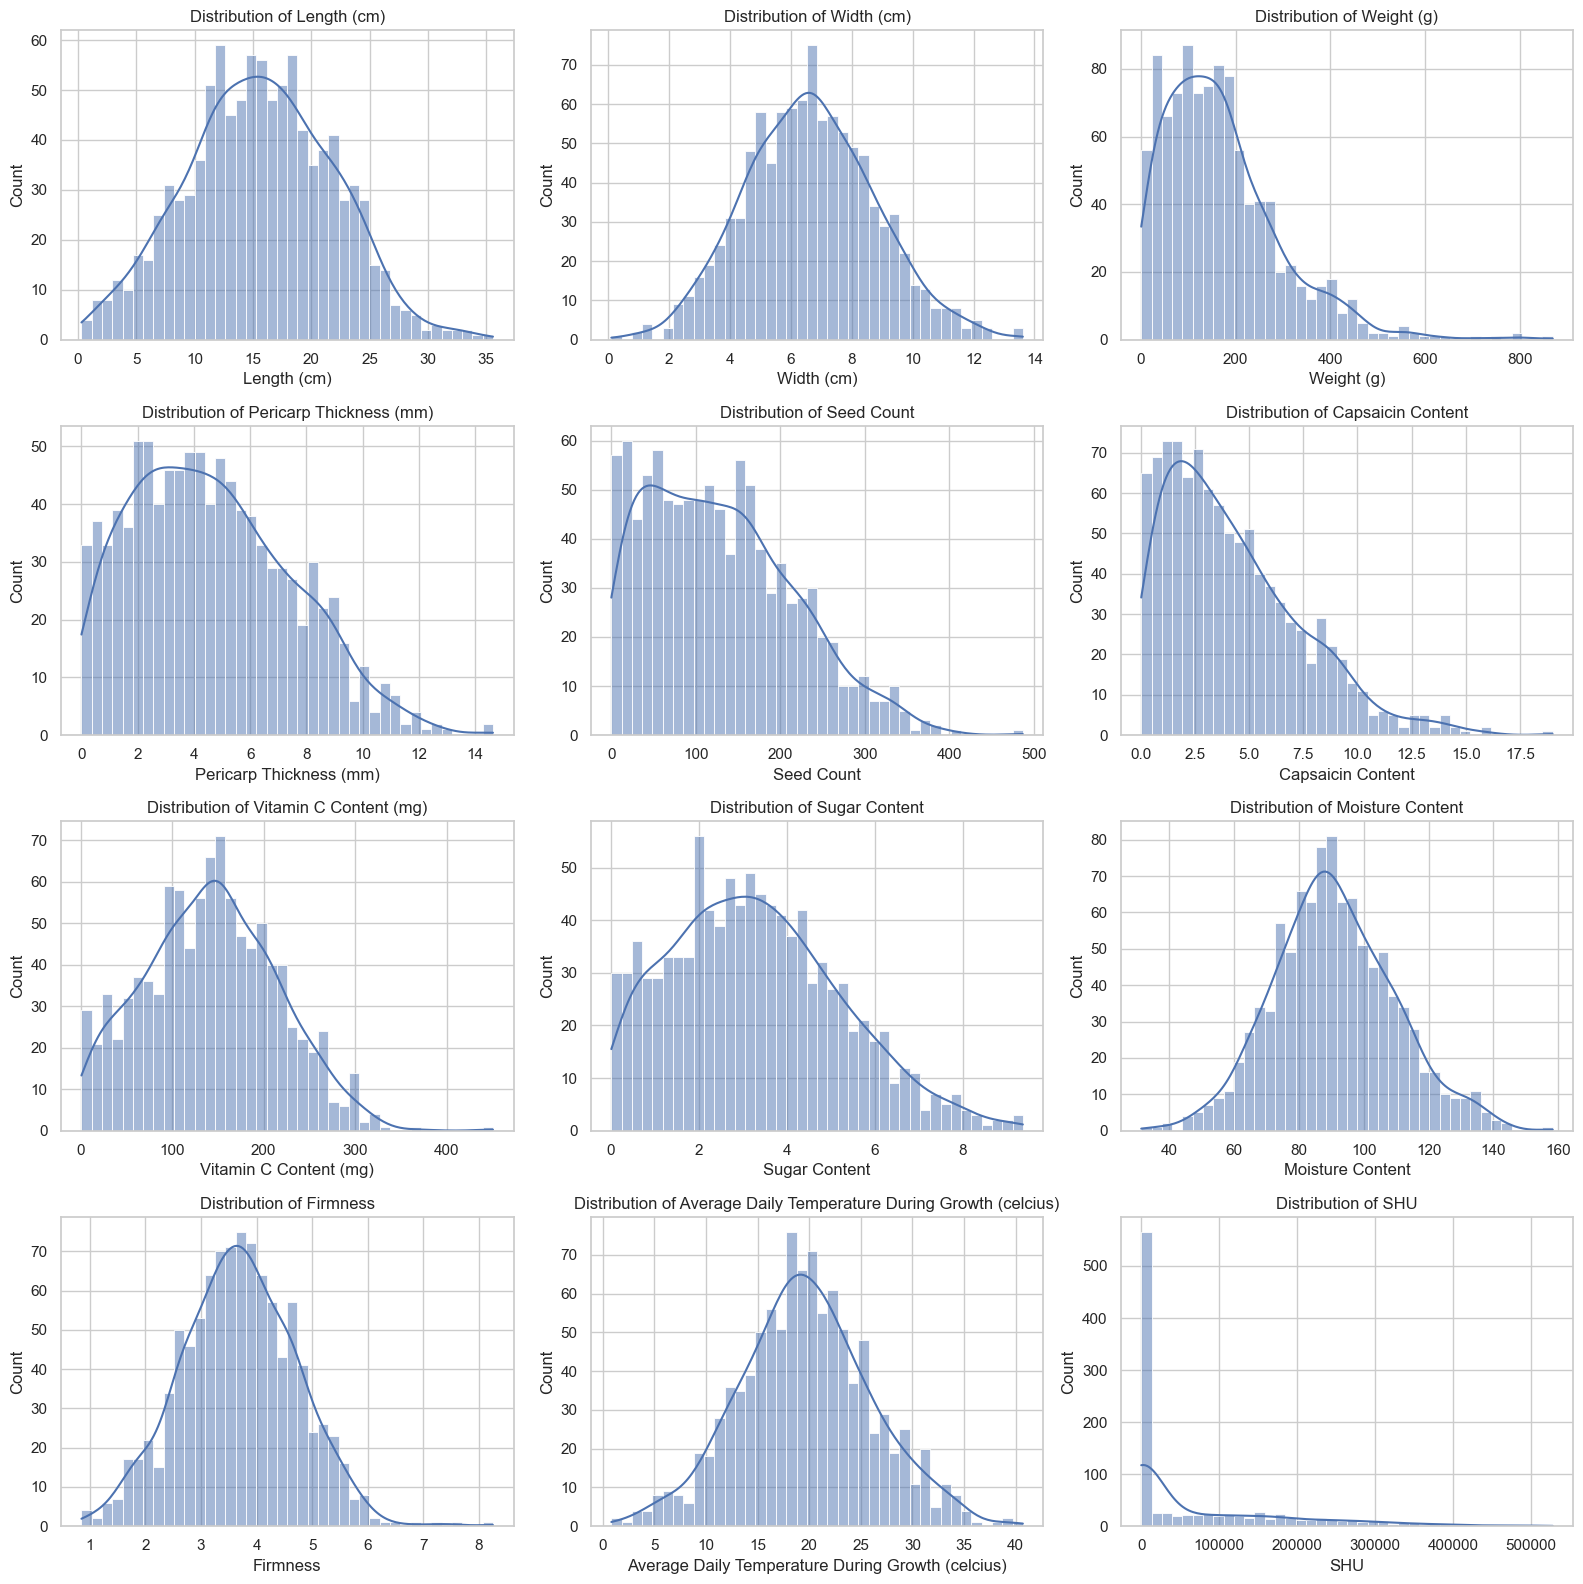

In [27]:
# Histograms of all numerical features
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axs = axs.ravel()

for i, col in enumerate(numeric_cols):
    sns.histplot(train_df[col], bins=40, kde=True, ax=axs[i])
    axs[i].set_title(f"Distribution of {col}")

# Remove unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Several numerical values shows approximately normal distributions, such as length, width, Moisture Content, Firmness and Average Daily temperature during growth. The other variables, such as weight, seed count, pericarp thickness, shows a clear right-skewed distribution with a high proportion of low values and long tails towards higher values. 

The SHU shows what we've seen earlier - there is an extreme skew with the majority of observations at zero and a long tail towards very high values. 

## **Data cleaning**

In [28]:
# Make copy for cleaning
train_clean = train_df.copy()

### *Missing Values*

In [29]:
# Investigate the missing values
missing = train_clean.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing / len(train_clean) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percent of Total': missing_percentage
})
missing_df = missing_df[missing_df['Missing Values'] > 0]

print("Missing values per column:")
print(missing_df)

Missing values per column:
                                              Missing Values  Percent of Total
Average Temperature During Storage (celcius)             648              64.8
Pericarp Thickness (mm)                                    2               0.2
Length (cm)                                                1               0.1
Width (cm)                                                 1               0.1
Weight (g)                                                 1               0.1
Seed Count                                                 1               0.1
Capsaicin Content                                          1               0.1
Sugar Content                                              1               0.1
Firmness                                                   1               0.1
color                                                      1               0.1


This provides the same information as we saw earlier - a lot of the missing values stems from Average Temperature During Storage (celsius) (64,8%). 

In [30]:
# Average Temperature During Storage has approx 65% missing values - removes because lack of relevance
train_clean.drop(columns=['Average Temperature During Storage (celcius)'], inplace=True)

# Impute numeric columns with median, which is robust against skewness and outliers
num_cols_with_na = train_clean.select_dtypes(include='number').columns[
    train_clean.select_dtypes(include='number').isnull().any()
]

for col in num_cols_with_na:
    median_value = train_clean[col].median()
    train_clean[col].fillna(median_value, inplace=True)

# Impute categorical column with modus - color only has one missing value, so we assume that there is a low risk of using modus
if train_clean['color'].isnull().sum() > 0:
    mode_color = train_clean['color'].mode()[0]
    train_clean['color'].fillna(mode_color, inplace=True)

# Check that all missing values has been handled 
missing_after = train_clean.isnull().sum().sum()
print(f"\nTotal missing values after cleaning: {missing_after}")


Total missing values after cleaning: 0


In [31]:
#Check that the feature color is correct
print(train_df['color'].unique())
print(train_clean['color'].unique())


['red' 'green' 'yellow' nan]
['red' 'green' 'yellow']


Average Temperature During Storage has been removed because of the large amount of missing values, and this feature is not seemed as providing any valuable information. 

The other columns with 1-2 missing values has been imputed by median.

The color column has 1 missing value, which has been imputed by mode. 

## **Data preprocessing and visualisation**

In [32]:
# Define categorical features
categorical_features = ['color', 'Harvest Time']

In [33]:
# All Numerical features
numeric_features_full = [
    'Length (cm)', 'Width (cm)', 'Weight (g)', 'Pericarp Thickness (mm)',
    'Seed Count', 'Capsaicin Content', 'Vitamin C Content (mg)',
    'Sugar Content', 'Moisture Content', 'Firmness',
    'Average Daily Temperature During Growth (celcius)'
]

In [34]:
# Reduced set of numerical features based on EDA correlations
numeric_features_reduced = [
    'Capsaicin Content',
    'Pericarp Thickness (mm)',
    'Seed Count',
    'Sugar Content',
    'Moisture Content'
]

In [35]:
# Preprocessor for all numerical features to use for some models
full_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_full),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [36]:
# Preprocessor for other models like ridge, lasso, pls
reduced_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_reduced),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [37]:
# Confirm setups
print("Preprocessing setup:\n")
print("Numerical features (full):")
print(numeric_features_full)
print("\nNumerical features (reduced):")
print(numeric_features_reduced)
print("\nCategorical features:")
print(categorical_features)

Preprocessing setup:

Numerical features (full):
['Length (cm)', 'Width (cm)', 'Weight (g)', 'Pericarp Thickness (mm)', 'Seed Count', 'Capsaicin Content', 'Vitamin C Content (mg)', 'Sugar Content', 'Moisture Content', 'Firmness', 'Average Daily Temperature During Growth (celcius)']

Numerical features (reduced):
['Capsaicin Content', 'Pericarp Thickness (mm)', 'Seed Count', 'Sugar Content', 'Moisture Content']

Categorical features:
['color', 'Harvest Time']


## **Modelling**

In [38]:
# Feature matrix and target
X = train_clean.drop(columns=["SHU"])
y = train_clean["SHU"]
log_y = np.log1p(y)  # log-transformed SHU

In [39]:
# Define MAE scorer
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

#### Pipeline A: Ridge regression with the reduced preprocessor

In [40]:
# PIPELINE A: Ridge Regression (log(SHU))
# Define pipeline with preprocessing and ridge
ridge_pipeline = Pipeline([
    ('preprocessor', reduced_preprocessor),
    ('regressor', Ridge())
])
# Define hyperparameter grid
ridge_grid = {'regressor__alpha': [0.01, 0.1, 1.0, 10.0]}

# Gridsearch with 5-fold cross-validation
ridge_search = GridSearchCV(ridge_pipeline, ridge_grid, cv=5, scoring=mae_scorer, n_jobs=-1)
ridge_search.fit(X, log_y)

# Extract best model and score
ridge_best_model = ridge_search.best_estimator_
ridge_best_mae_log = -ridge_search.best_score_
ridge_best_mae_shu = np.expm1(ridge_best_mae_log)

#### Alternative Pipeline A with log-transformed Random forest

In [41]:
# PIPELINE A-alt: Log-transformed Random Forest
# Define pipeline with preprocessing and Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', full_preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
# Define hyperparameter grid
rf_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, None],
    'regressor__min_samples_split': [2, 5]
}
# Grid search with 5-fold CV
rf_search = GridSearchCV(rf_pipeline, rf_grid, cv=5, scoring=mae_scorer, n_jobs=-1)
rf_search.fit(X, log_y)

# Extract best model and best score
rf_best_model = rf_search.best_estimator_
rf_best_mae_log = -rf_search.best_score_
rf_best_mae_shu = np.expm1(rf_best_mae_log)

#### Pipeline B: Classification with binned SHU

In [42]:
# PIPELINE B: Classification with binned SHU
# Create bins for SHU classes
y_binned = pd.cut(
    y,
    bins=[-1, 0, 10000, 100000, np.inf],
    labels=[0, 1, 2, 3]
).astype(int)

# Define pipeline with preprocessing and Random Forest classification
clf_pipeline = Pipeline([
    ('preprocessor', full_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Cross-validation for classification pipeline
clf_scores = cross_val_score(clf_pipeline, X, y_binned, cv=5, scoring='accuracy')

#### Pipeline C: Two-step Pipeline

In [43]:
# train test split for two-step model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Create binary target for spicy detection
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

In [45]:
# PIPELINE C: Two-step classification + regression
# Define classification pipeline - spicy vs. mild
clf_model_c = Pipeline([
    ("preprocessor", full_preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Define hyperparameter grid for classification
clf_param_grid_c = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [10, 20, None]
}

# Gridsearch 5-fold CV on binary classification
clf_search_c = GridSearchCV(clf_model_c, clf_param_grid_c, cv=5, scoring="recall", n_jobs=-1)
clf_search_c.fit(X_train, y_train_binary)

# Define regression pipeline for spicy peppers only
reg_model_c = Pipeline([
    ("preprocessor", full_preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Define hyperparameter grid for regression
reg_param_grid_c = {
    "regressor__n_estimators": [100, 200],
    "regressor__max_depth": [10, 20, None]
}

# Grid search 5-fold CV on spicy regression
reg_search_c = GridSearchCV(reg_model_c, reg_param_grid_c, cv=5, scoring=mae_scorer, n_jobs=-1)
reg_search_c.fit(X_train[y_train_binary == 1], y_train[y_train_binary == 1])    # Train only on spicy

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Length '
                                                                          '(cm)',
                                                                          'Width '
                                                                          '(cm)',
                                                                          'Weight '
                                                                          '(g)',
                                                                          'Pericarp '
                                                                          'Thickness '
                                                                          '(mm)',
                                                                          'Seed '
                                                                          'Count',
                                                                          'Capsaicin '
                                                                          'Content',
                                                                          'Vitamin '
                                                                          'C '
                                                                          'Content '
                                                                          '(mg)',
                                                                          'Sugar '
                                                                          'Content',
                                                                          'Moisture '
                                                                          'Content',
                                                                          'Firmness',
                                                                          'Average '
                                                                          'Daily '
                                                                          'Temperature '
                                                                          'During '
                                                                          'Growth '
                                                                          '(celcius)']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['color',
                                                                          'Harvest '
                                                                          'Time'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [10, 20, None],
                         'regressor__n_estimators': [100, 200]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'))

In [46]:
# Predict SHU using classification and regression models
cv_preds_binary = clf_search_c.predict(X_test)  # Spicy vs. mild
cv_preds_shu = np.zeros(len(X_test))    # Default prediction for mild

# Predict SHU only for predicted spicy peppers
cv_preds_shu[cv_preds_binary == 1] = reg_search_c.predict(X_test[cv_preds_binary == 1])

# Final evaluation of two-step model
mae_spicy = mean_absolute_error(y_test[y_test_binary == 1], cv_preds_shu[y_test_binary == 1])
mae_all = mean_absolute_error(y_test, cv_preds_shu)

### Summary from the models

In [47]:
print("=== Modelling Summary ===")
print(f"PIPELINE A - Ridge MAE (log):       {round(ridge_best_mae_log, 3)}")
print(f"PIPELINE A - Ridge MAE (SHU):       {round(ridge_best_mae_shu, 2)}")
print(f"PIPELINE A - Best Ridge alpha:      {ridge_search.best_params_['regressor__alpha']}")

print(f"\nPIPELINE A-alt - RF MAE (log):      {round(rf_best_mae_log, 3)}")
print(f"PIPELINE A-alt - RF MAE (SHU):      {round(rf_best_mae_shu, 2)}")
print(f"PIPELINE A-alt - RF Best Params:    {rf_search.best_params_}")

print(f"\nPIPELINE B - Classification Accuracy (Binned SHU): {round(clf_scores.mean(), 3)}")

print(f"\nPIPELINE C - Two-Step MAE (spicy only): {round(mae_spicy, 2)}")
print(f"PIPELINE C - Two-Step MAE (all peppers): {round(mae_all, 2)}")

=== Modelling Summary ===
PIPELINE A - Ridge MAE (log):       3.336
PIPELINE A - Ridge MAE (SHU):       27.12
PIPELINE A - Best Ridge alpha:      0.01

PIPELINE A-alt - RF MAE (log):      2.667
PIPELINE A-alt - RF MAE (SHU):      13.39
PIPELINE A-alt - RF Best Params:    {'regressor__max_depth': 10, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}

PIPELINE B - Classification Accuracy (Binned SHU): 0.717

PIPELINE C - Two-Step MAE (spicy only): 102446.38
PIPELINE C - Two-Step MAE (all peppers): 57014.24


Firstly the datasets were split into a feature-matrix (X) and the target variable (y). Given the big skewness in the SHU, we chose to construct a log-transformed version of the target variable by using log(1+SHU) to reduce the impact of extreme values. The regression models were evaluated by MAE, while the classification model were scored by accuracy. 

Three/four pipelines were built. 

**Pipeline A - Ridge regression on log-transformed SHU**

The first pipeline consisted of a ridge regressor with the reduced feature set and log-transformed SHU. The numerical features has been standardized, and the categorical features has been One-Hot encoded. The hyperparameter alpha was optimalized using grid search cross-validation with 5-folds, and MAE used as evaluationscore. The best model gave the following results:
- MAE (log-transformed SHU): 3.336
- MAE (converted to SHU-scale): 27.12
- Best alpha: 0.01

**Pipeline A-alt - Random Forest regressor on log-transformed SHU**

This alternative pipeline was built with a random forest regressor on the log-transformed target. Hyperparameters were optimalized through grid search and 5-fold CV. The results were:
- MAE (log-transformed SHU): 2.667
- MAE (converted to SHU-scale): 13.39
- Best hyperparameters:
  - n_estimators = 200
  - max_depth = 10
  - min_samples_split = 5

**Pipeline B - Random Forest Classifier**

Pipeline B uses a Random Forest Classifier where the target variable is binned into four classes based on SHU-values. These classes represents non-spicy peppers and three levels of increasing spiciness. The model were evaluated using accuracy with 5-fold cross-validation. The accuracy score resulted in 0.717. 

**Pipeline C - two-step model**

The pipeline C implemented a sequential two-step model to predict the SHU. Firstly, a binary target variable were constructed, where peppers with SHU > 0 was classified as spicy (1) and peppers with SHU < 0 were classified as mild (0). A random forest classifier was then trained to predict this binary category based on all inputs. The aim was to avoid using regression on peppers which doesnt have spicyness. After classifying the peppers, only peppers classified as spicy was used further on. For these, a random forest regressor was trained to estimate the exact SHU-value. The regressionmodel were trained only on spicy peppers to learn the relationship between the features and SHU without noise from peppers withouth capasaicin. The results was as follows:
- MAE on spicy peppers: 102.446,38
- MAE on all peppers: 57.014,24
  
We tested different probability thresholds (0.2-0.5) on the classifier's predicted probabilities. Lower thresholds improved the recall of spicy peppers and slightly reduced the MAE on spicy peppers, but it increased the overall MAE. Therefore we kept the default threshold of 0.5, as it provided the lowest total MAE. 

#### Confusion Matrix and Barplot

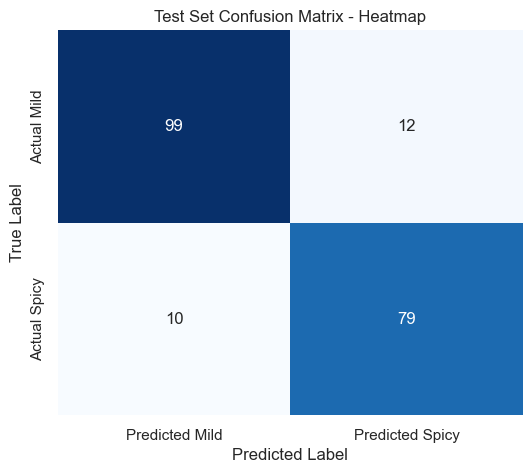

In [62]:
# Calculate Confusion matrix on test set
cm_test = confusion_matrix(y_test_binary, cv_preds_binary)
tn, fp, fn, tp = cm_test.ravel()

plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Mild', 'Predicted Spicy'],
            yticklabels=['Actual Mild', 'Actual Spicy'])
plt.title("Test Set Confusion Matrix - Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

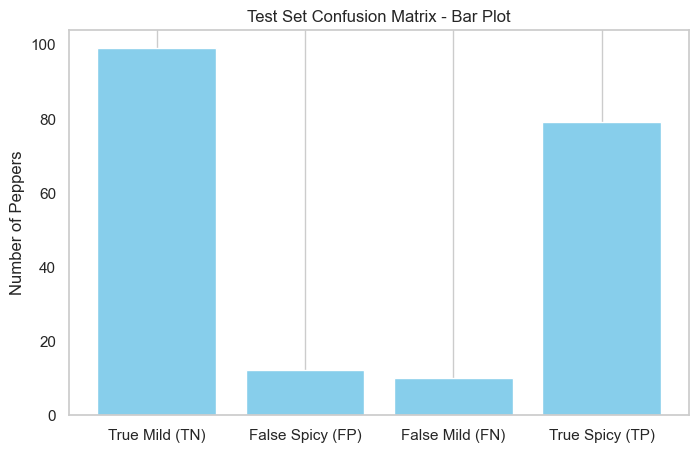

In [63]:
# Plotting a barplot
labels = ['True Mild (TN)', 'False Spicy (FP)', 'False Mild (FN)', 'True Spicy (TP)']
values = [tn, fp, fn, tp]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color='skyblue')
plt.title("Test Set Confusion Matrix - Bar Plot")
plt.ylabel("Number of Peppers")
plt.grid(axis='y')
plt.show()

In [64]:
# Accuracy score
accuracy = accuracy_score(y_test_binary, cv_preds_binary)

# Print counts and accuracy
print(f"True Mild predicted correctly (TN): {tn}")
print(f"Mild misclassified as Spicy (FP): {fp}")
print(f"Spicy misclassified as Mild (FN): {fn}")
print(f"True Spicy predicted correctly (TP): {tp}")
print(f"\n Classification Accuracy on Test Set: {accuracy:.3f} ({round(accuracy * 100, 1)}%)")

True Mild predicted correctly (TN): 99
Mild misclassified as Spicy (FP): 12
Spicy misclassified as Mild (FN): 10
True Spicy predicted correctly (TP): 79

 Classification Accuracy on Test Set: 0.890 (89.0%)


The results indicated that the model got a high classification accuracy score on the test set of 89%. Most of the mild peppers are correctly identified (99 TN), and a big portion of the spicy peppers are classified correctlu (79 TP). There is still some misclassified peppers - 12 of the mild peppers are wrongly classified as spicy (FP) and 10 of the spicy peppers are wrongly classified as mild (FN). The wrongly classifications of spicy peppers (FN) is impacting the pipeline, as wrongly predicted to mild leads to that a pepper with high real SHU gets a SHU predicted to 0, leading to a higher MAE-score, especially for the spicy peppers. 

## **Final evaluation**

In [65]:
# Load test set
test_df = pd.read_csv("test.csv")
test_clean = test_df.copy()

In [66]:
# Drop irrelevant column
test_clean.drop(columns=['Average Temperature During Storage (celcius)'], inplace=True)

In [67]:
# Impute missing numerical features with median
num_cols_with_na_test = test_clean.select_dtypes(include='number').columns[
    test_clean.select_dtypes(include='number').isnull().any()
]
for col in num_cols_with_na_test:
    median_value = test_clean[col].median()
    test_clean[col].fillna(median_value, inplace=True)

# Impute missing categorical feature 'color' with mode
if test_clean['color'].isnull().sum() > 0:
    mode_color_test = test_clean['color'].mode()[0]
    test_clean['color'].fillna(mode_color_test, inplace=True)

### *Predictions on the different pipelines*

In [68]:
# # Pipeline A - Ridge Regression on log(SHU)
ridge_log_preds = ridge_best_model.predict(test_clean)
ridge_log_preds = np.maximum(ridge_log_preds, 0)  # Avoid negative preds
ridge_preds = np.expm1(ridge_log_preds)

In [69]:
submission_ridge = pd.DataFrame(ridge_preds, columns=['Scoville Heat Units (SHU)'])
submission_ridge.index = test_clean.index
submission_ridge.index.name = "index"
submission_ridge.to_csv("CA5_pipelineA.csv", index=True)
print("Submission ready!")

Submission ready!


In [70]:
# # Pipeline A-alt - Random Forest Regression on log(SHU)
rf_log_preds = rf_best_model.predict(test_clean)
rf_log_preds = np.maximum(rf_log_preds, 0)
rf_preds = np.expm1(rf_log_preds)

In [71]:
submission_rf = pd.DataFrame(rf_preds, columns=['Scoville Heat Units (SHU)'])
submission_rf.index = test_clean.index
submission_rf.index.name = "index"
submission_rf.to_csv("CA5_pipelineA_alt.csv", index=True)
print("Submission ready!")

Submission ready!


In [72]:
# Pipeline C - Two-step model (classification + regression)

# Predict probabilities on test set
test_probs = clf_search_c.predict_proba(test_clean)[:, 1]
test_preds_binary = (test_probs > 0.5).astype(int)

# Initialize prediction array
test_preds_shu = np.zeros(len(test_clean))

# Predict SHU only for peppers classified as spicy
test_preds_shu[test_preds_binary == 1] = reg_search_c.predict(test_clean[test_preds_binary == 1])

In [73]:
submission_two_step = pd.DataFrame(test_preds_shu, columns=['Scoville Heat Units (SHU)'])
submission_two_step.index = test_clean.index
submission_two_step.index.name = "index"
submission_two_step.to_csv("CA5_pipelineC.csv", index=True)
print("Submission ready!")

Submission ready!


The final evaluation on Kaggle showed that Pipeline C achieved the lowest MAE compared to Pipeline A and A-alt. The scores were:
- Pipeline A: 73440.44963
- Pipeline A_alt: 60801.35677
- Pipeline C: first a score of 56214.47733 under julieringstad and later at 56729.98090 under guggen98/group 16 (Some tweakings were done after the first score, but we can't remember exactly what. But the scores are not that different either)